# Coding seminar Lesson 2 – Divide and conquer: read, calculate, plot, save

In this lesson, we will cover basic data input/output using packages.

## Agenda
- Quick introduction of packages
- Ask ChatGPT
- Read a csv file using `numpy`
- Indexing and basic calculations of `numpy.ndarray`
- Basic plotting with `matplotlib`
- Save image and data
- `pandas` and `seaborn`: handling non-numerical data

## Quick introduction of packages

As we covered in Lesson 1, Python has a capacity to add libraries with additional functions.
In this lesson, we handle below packages:
- `numpy`
  Contains calculation tools, including trigonometric functions, exponentiation, logarithm, imaginary number, vector, matrix, plus input/output function of text files, and more.
- `matplotlib`
  One of the basic packages for plotting. Light weight yet easy to tweak.
- `pandas`
  Package to handle data tables that contain non-numerical data for more statistical purpose than `numpy`. Very intuitive.
- `seaborn`
  Another package for plotting, with powerful tools for data visualization.

## Ask ChatGPT

Since we have access to ChatGPT, let's try it out.
Let's ask

> I want to read a csv file then plot it.

and ChatGPT will give you already detailed answer. Probably it recommends `pandas` packages to use, but this time we'll use `numpy`.

## Read a csv file using `numpy`

### Get the demo file and check the beginning

First, download the demo file.
From [seminar GitHub page](https://github.com/ikuehirata/CodingSeminar_IIT_CMI_2023), click [Lesson2_ecg.csv](https://github.com/ikuehirata/CodingSeminar_IIT_CMI_2023/blob/main/Lesson2_ecg.csv) and click the download button on the right. Drag and drop the downloaded file to the Visual Code Studio workspace of yours.

Let's check the contents of the file by opening it on VS Code. You'll see first lines like

> # Date/Time Start;23/06/2023 17:20:36
> # Sample Period (ms);7.8125 ms
> Note;
> TimeElapsed (ms),Signal Voltage (mV) 
> 70.3125,-39
> 78.125,-51
> 85.9375,-59

Lines 1-4 are comments and headers and we can ignore them. From line 5, numbers are written, separated by ",".
No matter what the format of your file is, it's always a good habit to check the file in raw form,
to give appropriate parameters to the function to read the file.

### Function to read a csv file

To read a csv file, popular functions are
- `numpy.genfromtxt`, does a quick job but cannot handle non-numerical data.
- `numpy.loadtxt`, can handle various data type. You might need post-processing to format the data.
- `pandas.read_csv`, can handle various data type and generates more intuitive `pandas.DataFrame` object, but slow when handling a large volume of data.

Let's use `numpy.genfromtxt` this time. The function takes a file name as an argument, and returns a `numpy.ndarray` object.
Start typing like below:

In [1]:
import numpy as np
ar = np.genfromtxt('Lesson2_ecg.csv')
print(ar)

ValueError: Some errors were detected !
    Line #4 (got 4 columns instead of 1)

First row is to import `numpy` package. Using `as` keyword, you can rename the package name to a shorter one.

And then, you encountered an error because Python reads the file's line 1-4, expecting some numbers, but found strings instead.
We have to tell Python to ignore the first 4 lines. Let's check the document of [`numpy.genfromtxt`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html). There's a keyword argument `skip_header` that does exactly what we want. Add `skip_header=4` to the argument list.

In [2]:
import numpy as np
ar = np.genfromtxt('Lesson2_ecg.csv', skip_header=4)
print(ar)

[nan nan nan ... nan nan nan]


This time you got only `nan`. Something is wrong. Let's ask ChatGPT again (you can add line break by `Shift` + `Enter` without sending the message).

> I ran
> np.genfromtxt("Lesson2_ecg.csv", skip_header=4)
> and I got [nan nan nan...]. What's wrong?

ChatGPT's answer is:

- Incorrect CSV format
- Missing or inconsistent data
- Non-numeric data
- Encoding issues

Among these, what is actually happening is the first one. The document describes that the default delimiter of `numpy.genfromtxt` is consecutive white spaces (such as "    ") but the file we have is separated by ",". Add `delimiter=","` to the argument.

In [3]:
import numpy as np
ar = np.genfromtxt('Lesson2_ecg.csv', skip_header=4, delimiter=',')
print(ar)

[[   70.3125   -39.    ]
 [   78.125    -51.    ]
 [   85.9375   -59.    ]
 ...
 [10054.6875   -65.    ]
 [10062.5      -65.    ]
 [10070.3125   -50.    ]]


Now we got the correct result!

## Indexing and basic calculations of `numpy.ndarray`

### Indexing

`numpy.ndarray` is a multi-dimensional array. You can access each element by indexing. This is like a list, which elements are again lists. `numpy.ndarray` can enhance the dimension by increaes nesting.

The array can be accessed by `array[i, j]` where `i` and `j` are indices of the array. `i` is the index of axis 0 (row in 2D array) and `j` is the index of axis 1 (column in 2D array).

### Basic calculations

Here are some examples of basic calculations of `numpy.ndarray`:

In [4]:
ar1 = ar - 1000
print(ar1)

[[ -929.6875 -1039.    ]
 [ -921.875  -1051.    ]
 [ -914.0625 -1059.    ]
 ...
 [ 9054.6875 -1065.    ]
 [ 9062.5    -1065.    ]
 [ 9070.3125 -1050.    ]]


In [5]:
ar2 = ar * 2
print(ar2)

[[  140.625   -78.   ]
 [  156.25   -102.   ]
 [  171.875  -118.   ]
 ...
 [20109.375  -130.   ]
 [20125.     -130.   ]
 [20140.625  -100.   ]]


In [6]:
ar3 = ar.copy()
ar3[:, 1] = ar3[:, 1] * 2
print(ar3)

[[   70.3125   -78.    ]
 [   78.125   -102.    ]
 [   85.9375  -118.    ]
 ...
 [10054.6875  -130.    ]
 [10062.5     -130.    ]
 [10070.3125  -100.    ]]


In the final example, `ar3` is a duplicate of `ar`. If you change the line 1 to `ar3 = ar`, `ar3` will be a reference to `ar`. This means that if you change `ar3`, `ar` will also be changed. muThis is because `numpy.ndarray` is a **mutable** object.

## Basic plotting with `matplotlib`

To plot a graph, again you can ask ChatGPT. It gives you some direction, but, sometimes it's wrong. **Always make sure by double-checking the referred document.**

The sample code ChatGPT gave you is:

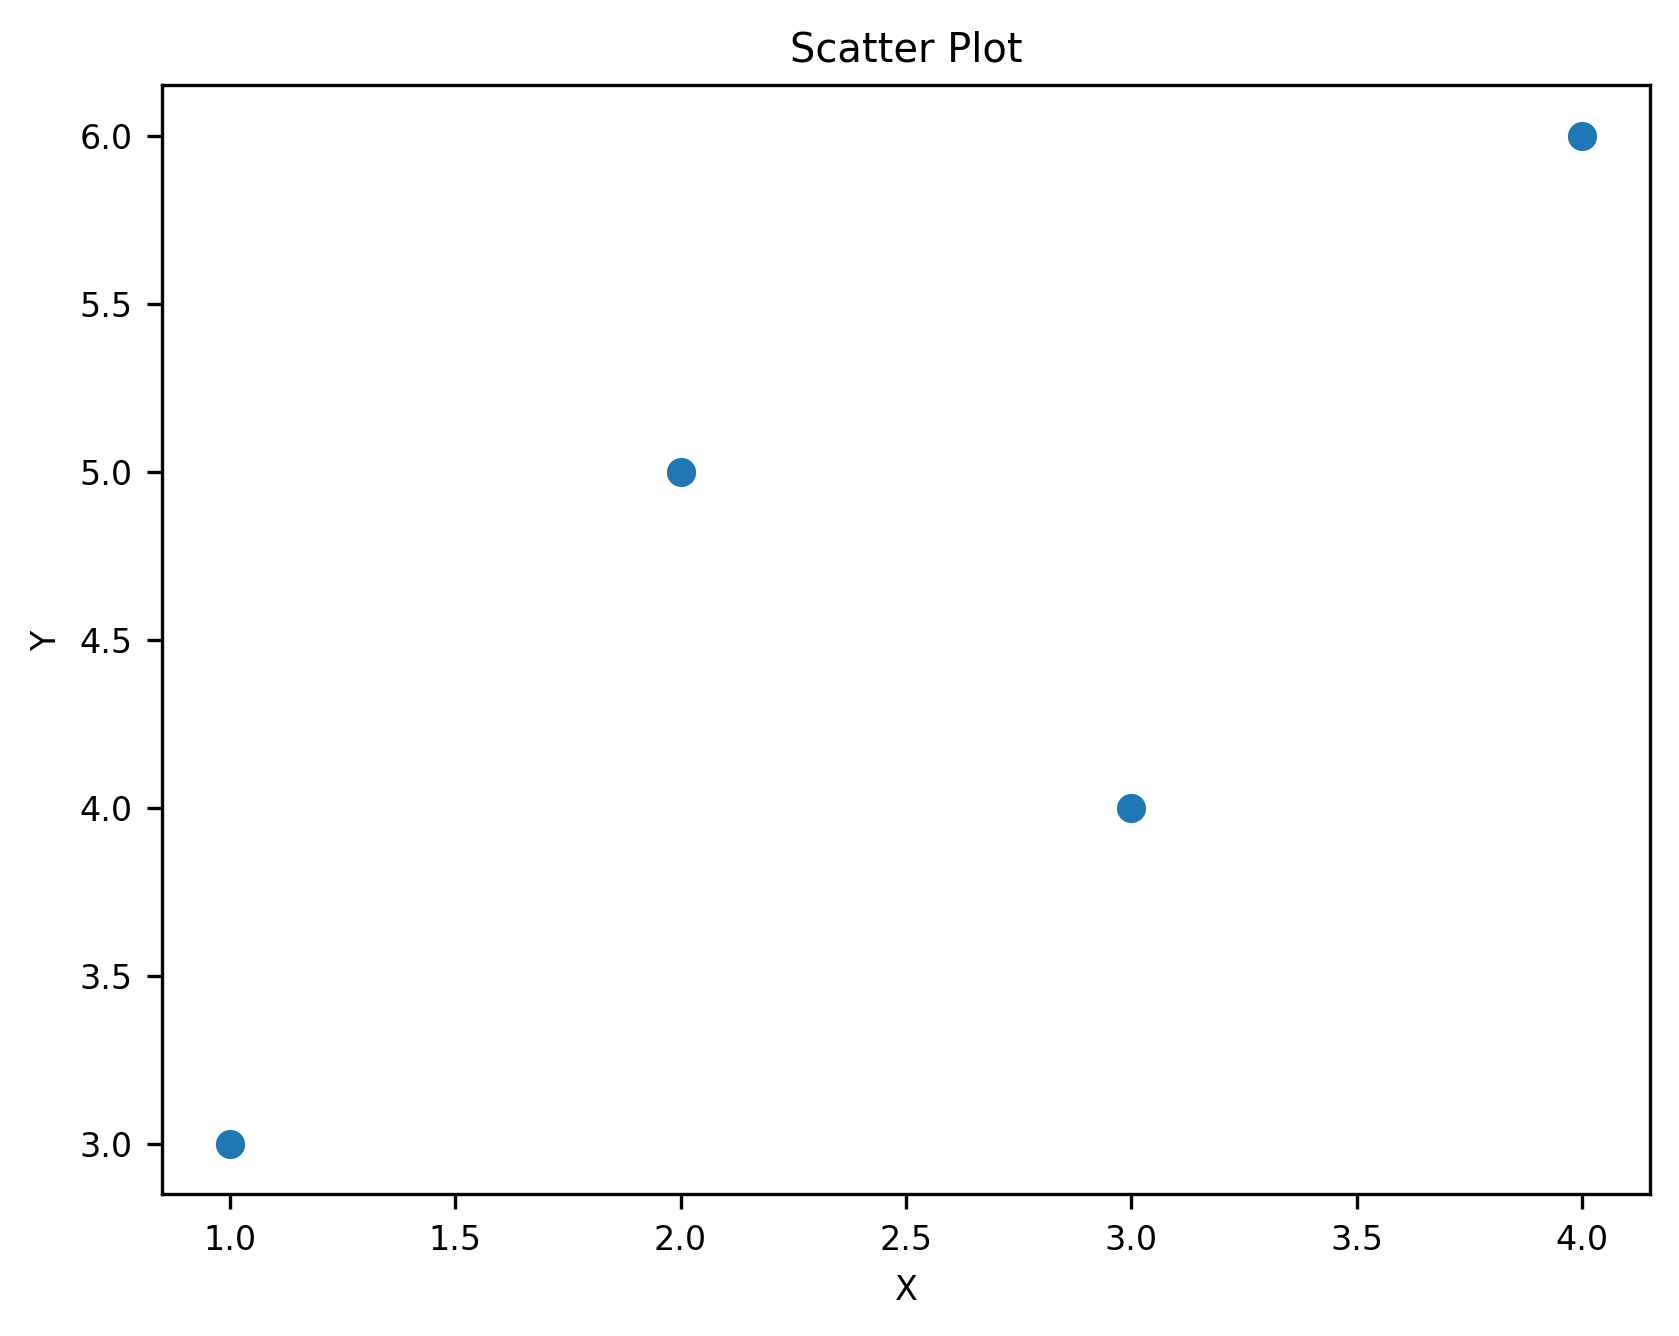

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
data = np.array([[1, 3], [2, 5], [3, 4], [4, 6]])

# Extract the columns
x = data[:, 0]
y = data[:, 1]

# Plot the data as a scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')

# Display the plot
plt.show()

From here, you can modify the code to suit your purpose.
Line 5 is where the data is given, then x and y are extracted by slicing in line 8 and 9. Actual plotting is line 10, after that is styling.

One example of the minimal code to plot our data is:

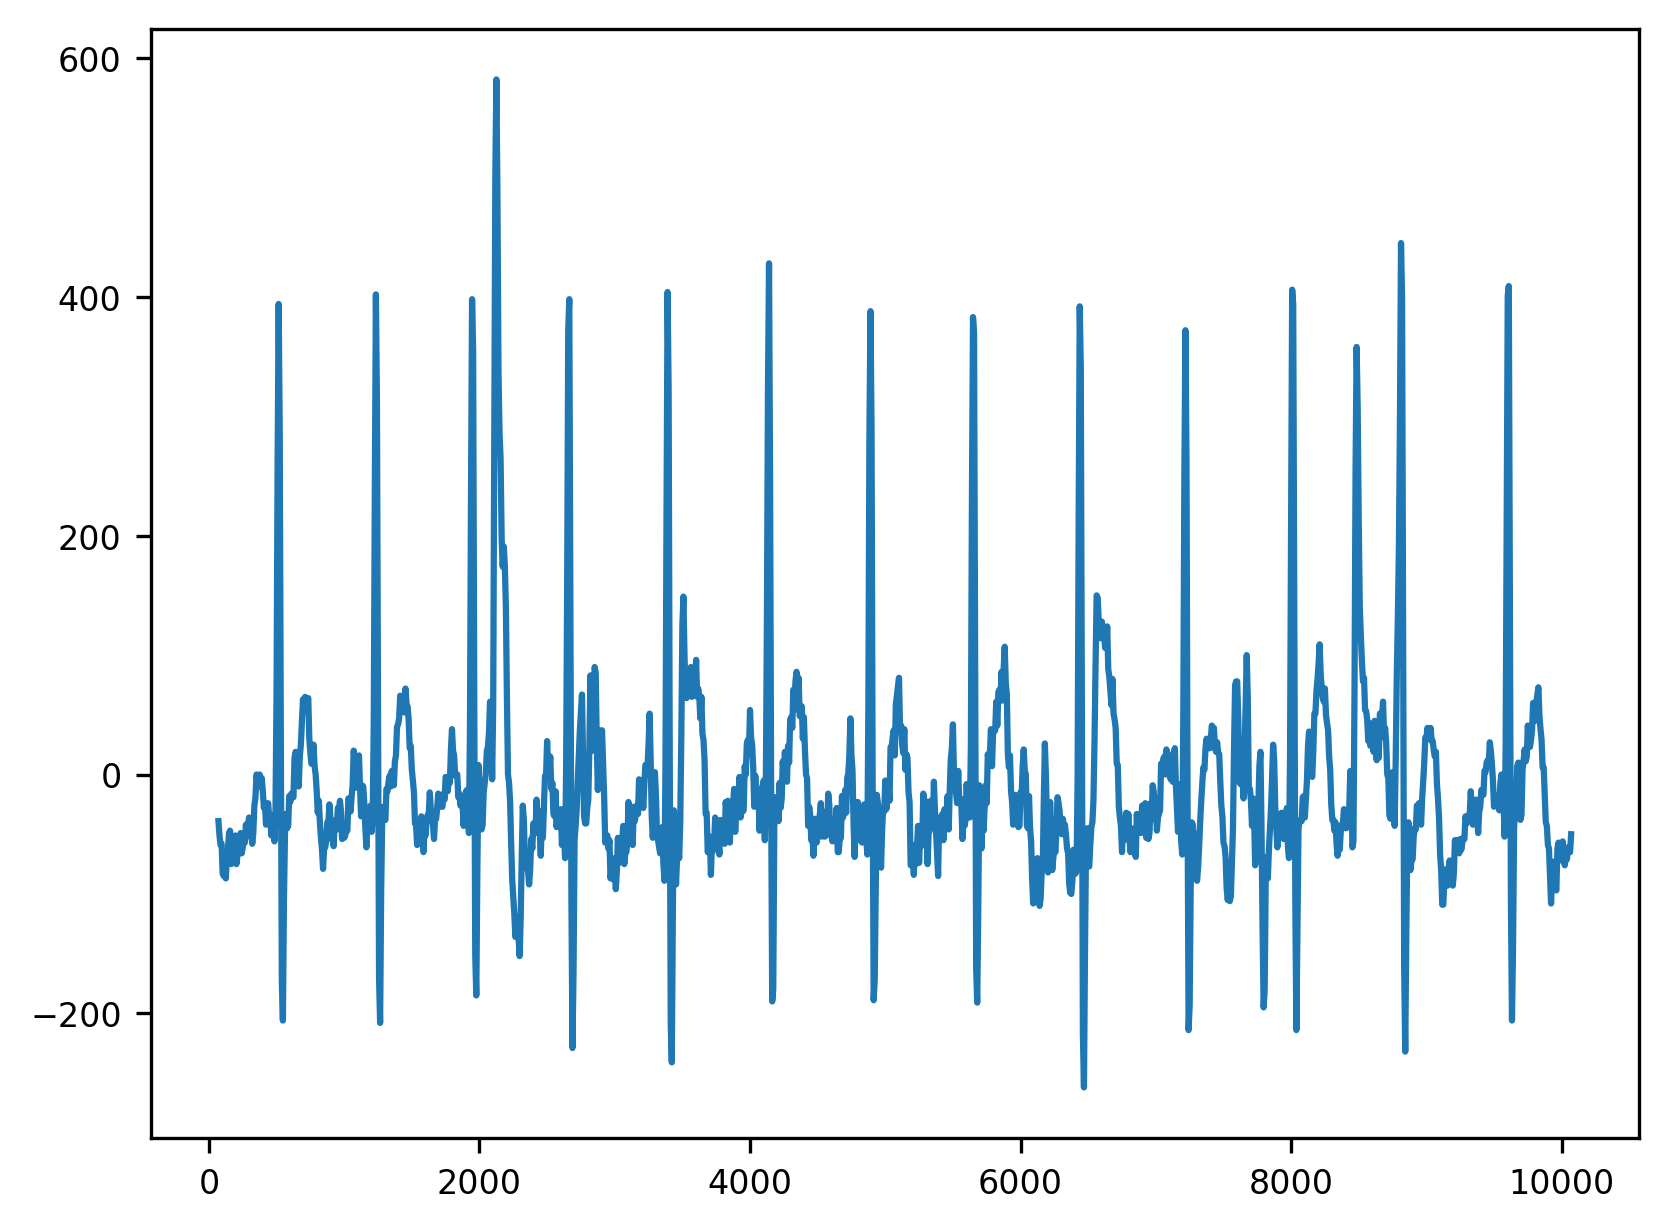

In [8]:
import matplotlib.pyplot as plt
plt.plot(ar[:, 0], ar[:, 1])
plt.show()

OK, this doesn't look very good in the sense of style. Improvement to the code can be:
- Add x and y labels
- Make line thinner so you can see the signal shape better
- Remove the gap at the both edge of x axis

Below is an example of styling. A bit Nature-ish, right? Many the details of the styling can be found in the document of [`matplotlib` Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html).

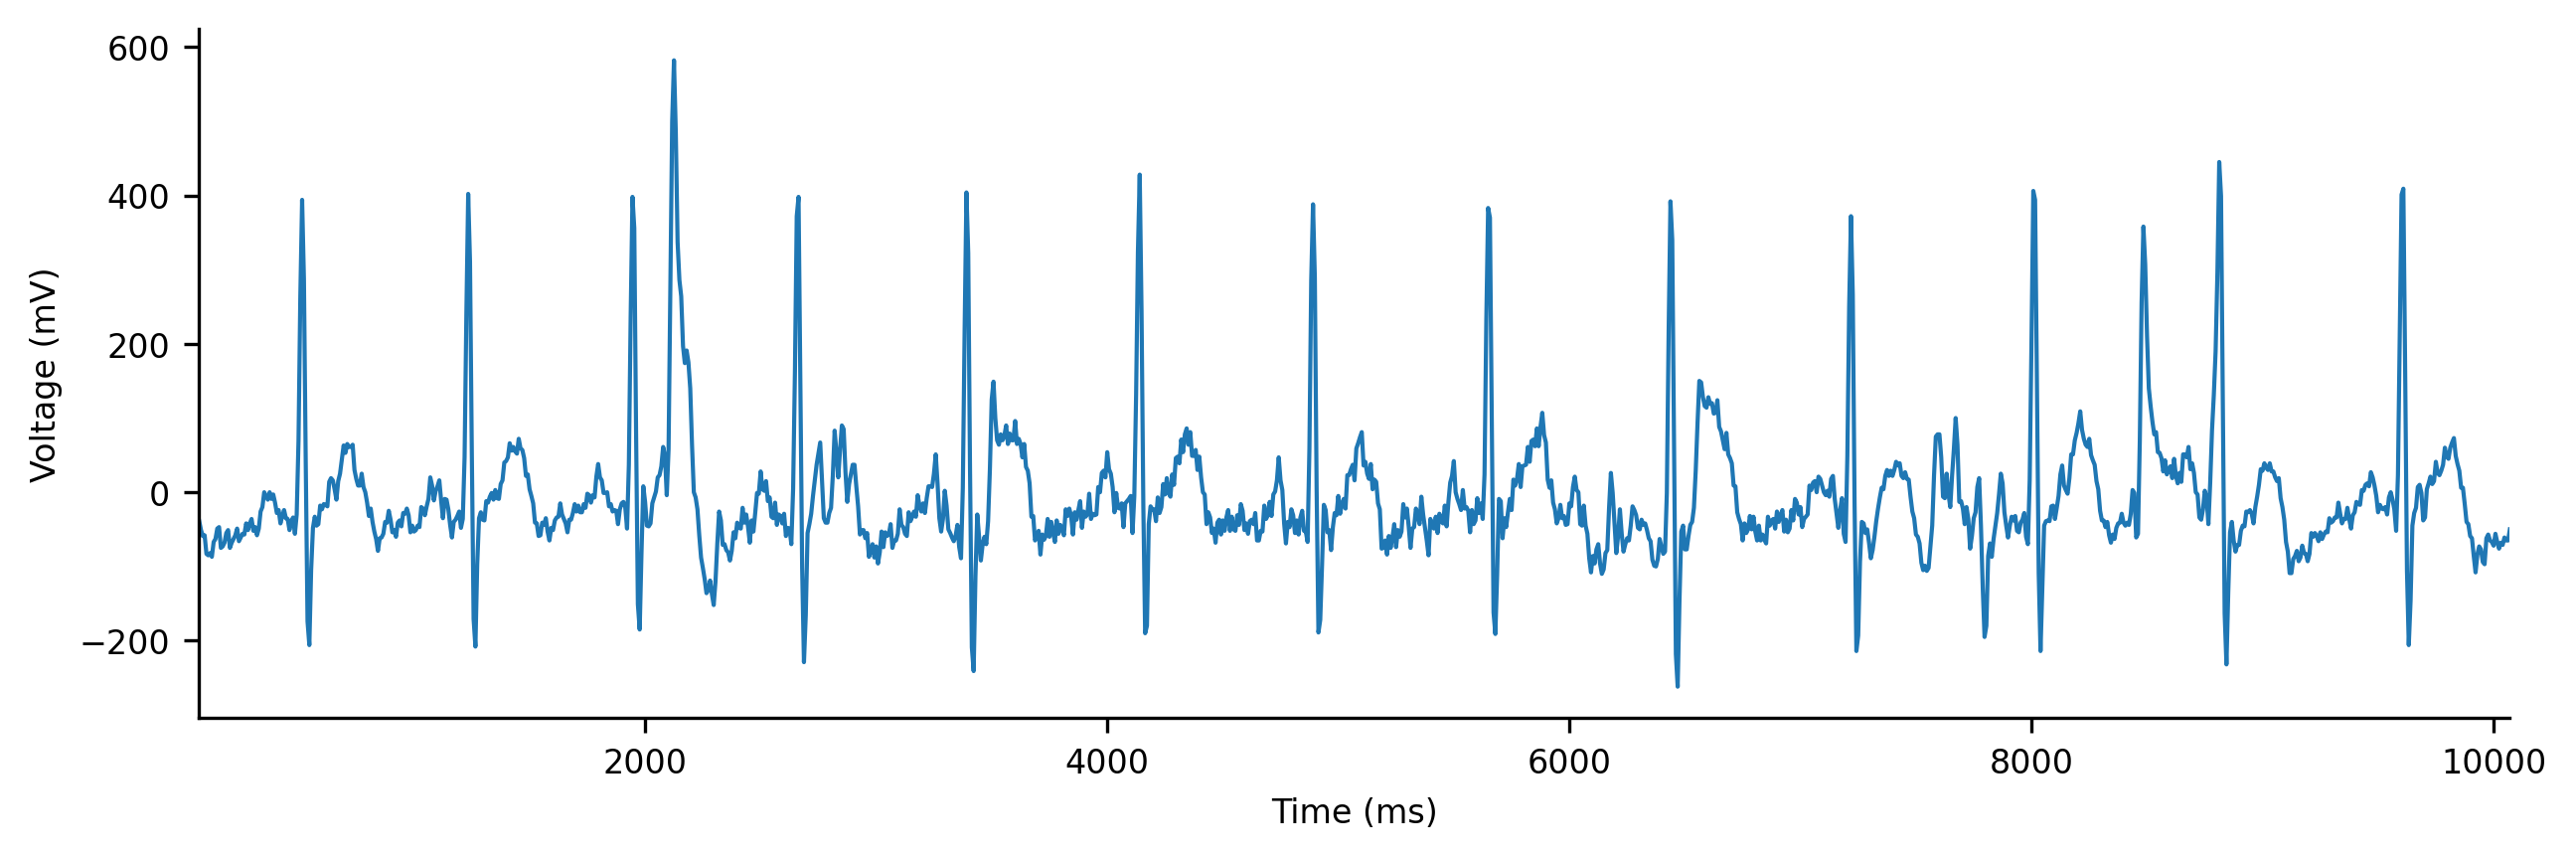

In [9]:
fig, ax = plt.subplots(figsize=(10, 3))  # create objects
ax.spines['top'].set_visible(False)  # hide top border
ax.spines['right'].set_visible(False)  # hide right border
ax.plot(ar[:, 0], ar[:, 1], lw=1)  # plot data with line width 1
ax.set_xlim(ar[:, 0].min(), ar[:, 0].max())  # x axis range
ax.set_xlabel("Time (ms)")  # x label
ax.set_ylabel("Voltage (mV)")  # y label
plt.show()  # show result

What is good about this code is, once you set up the "template", you can reuse it for other data.

Let's explore `matplotlib` a bit more. In the [Examples](https://matplotlib.org/stable/gallery/index.html) page, you can find many examples of plots. You can copy the code and modify it to suit your purpose. For example, let's see [Aligning Labels](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/align_labels_demo.html#sphx-glr-gallery-subplots-axes-and-figures-align-labels-demo-py) example.
Open the page, simply copy the code, and paste it to your notebook. You'll get a plot like below:

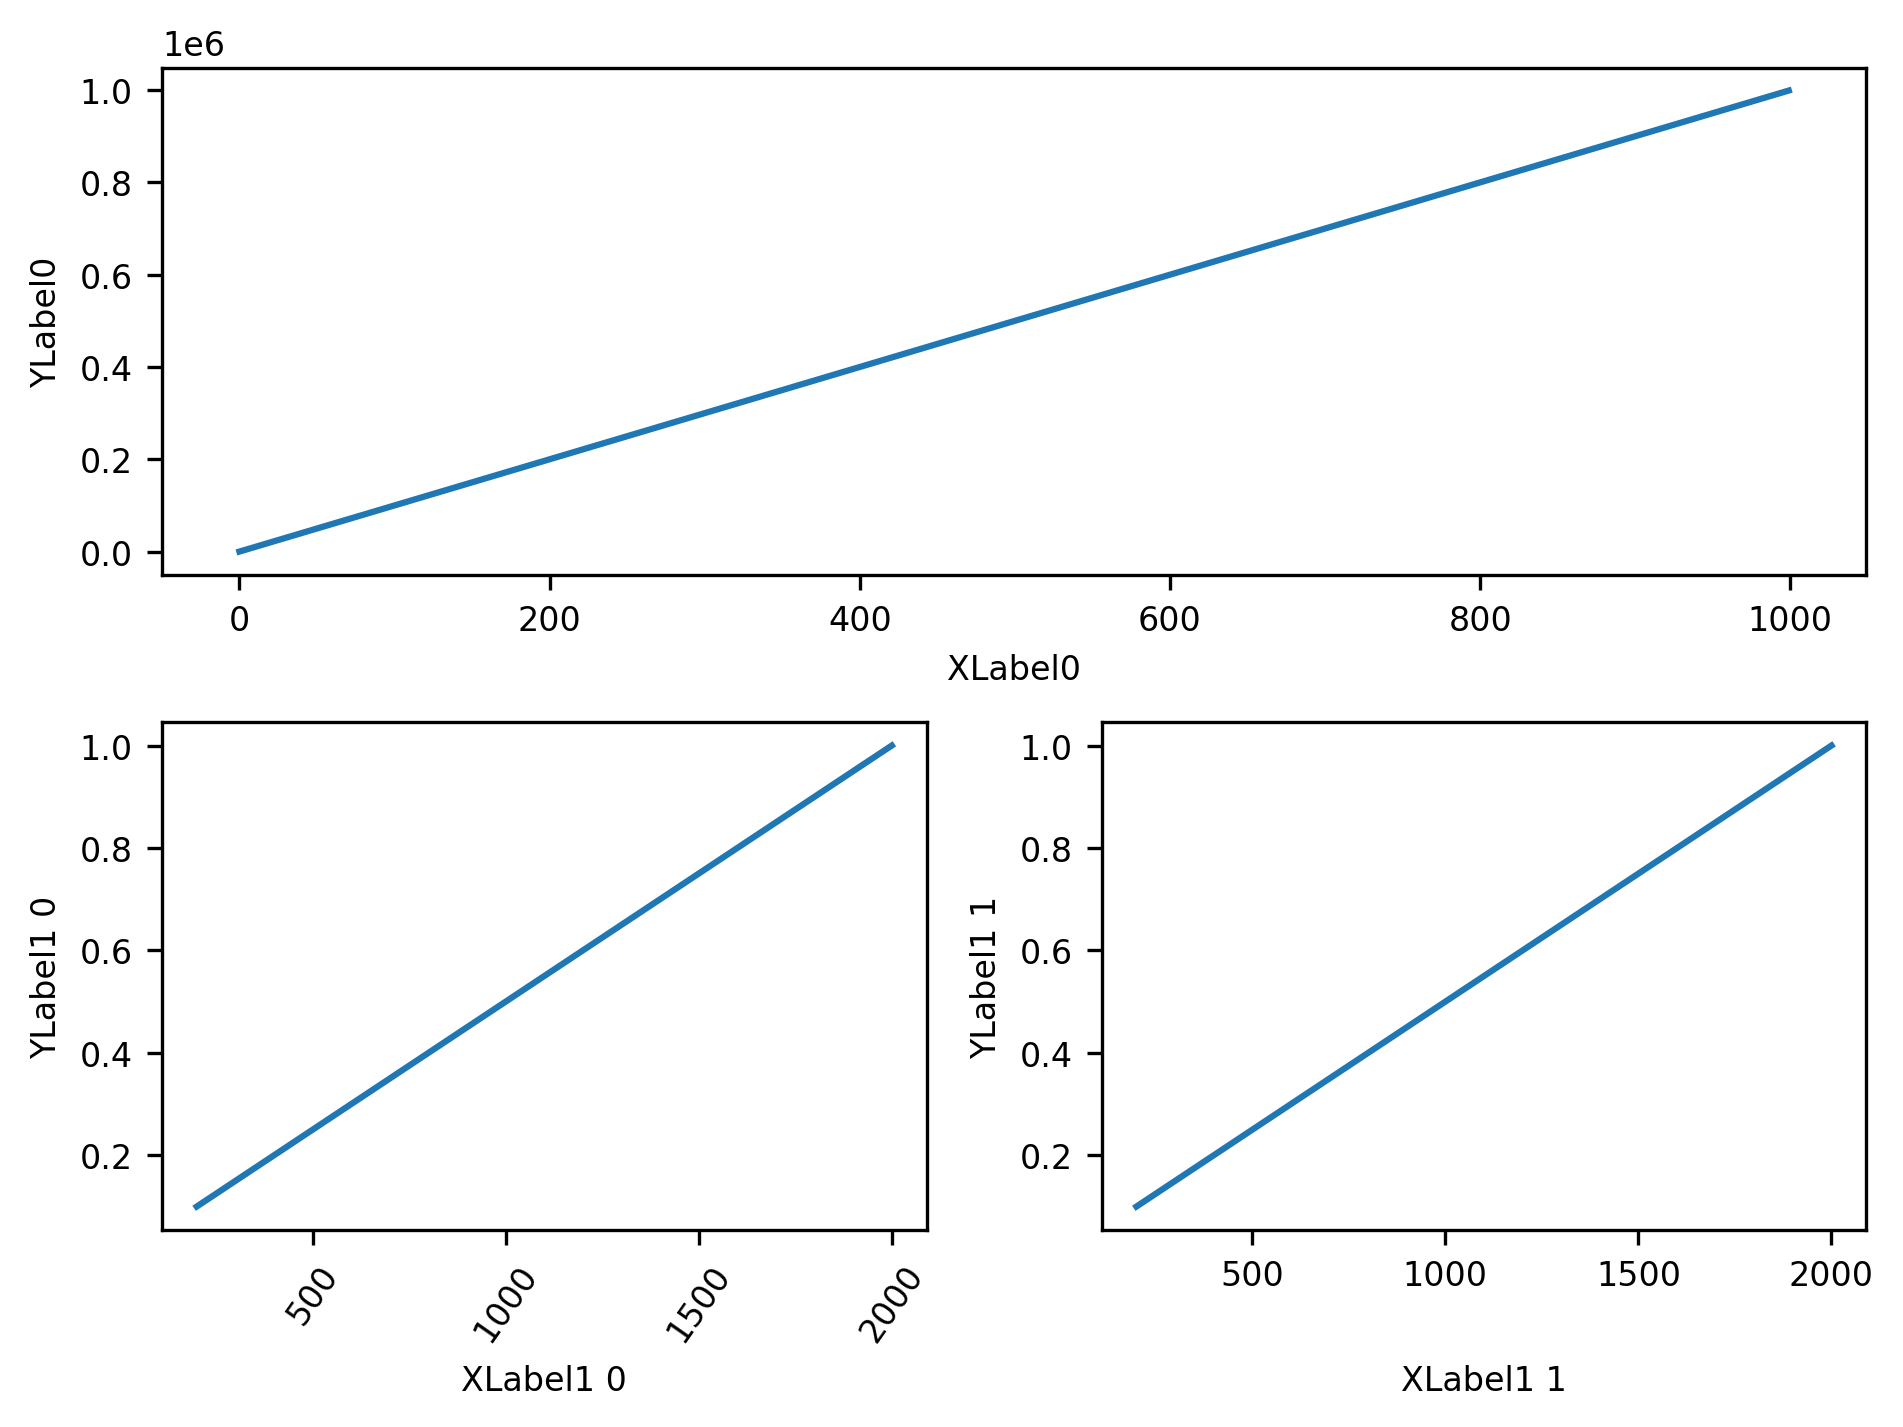

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(np.arange(0, 1e6, 1000))
ax.set_ylabel('YLabel0')
ax.set_xlabel('XLabel0')

for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    ax.plot(np.arange(1., 0., -0.1) * 2000., np.arange(1., 0., -0.1))
    ax.set_ylabel('YLabel1 %d' % i)
    ax.set_xlabel('XLabel1 %d' % i)
    if i == 0:
        ax.tick_params(axis='x', rotation=55)
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.show()

Thanks to the label names, you'll see which labels are actually set in the code. Here you see a new element `gridspec`. If you need to know more, check the document of [`matplotlib.gridspec`](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.html) and you'll see what options are available.

## Save image and data

Finally, let's save the image and data. To save the image, use `matplotlib.pyplot.savefig`.
Note that `matplotlib.pyplot.savefig` must be called before `matplotlib.pyplot.show`.

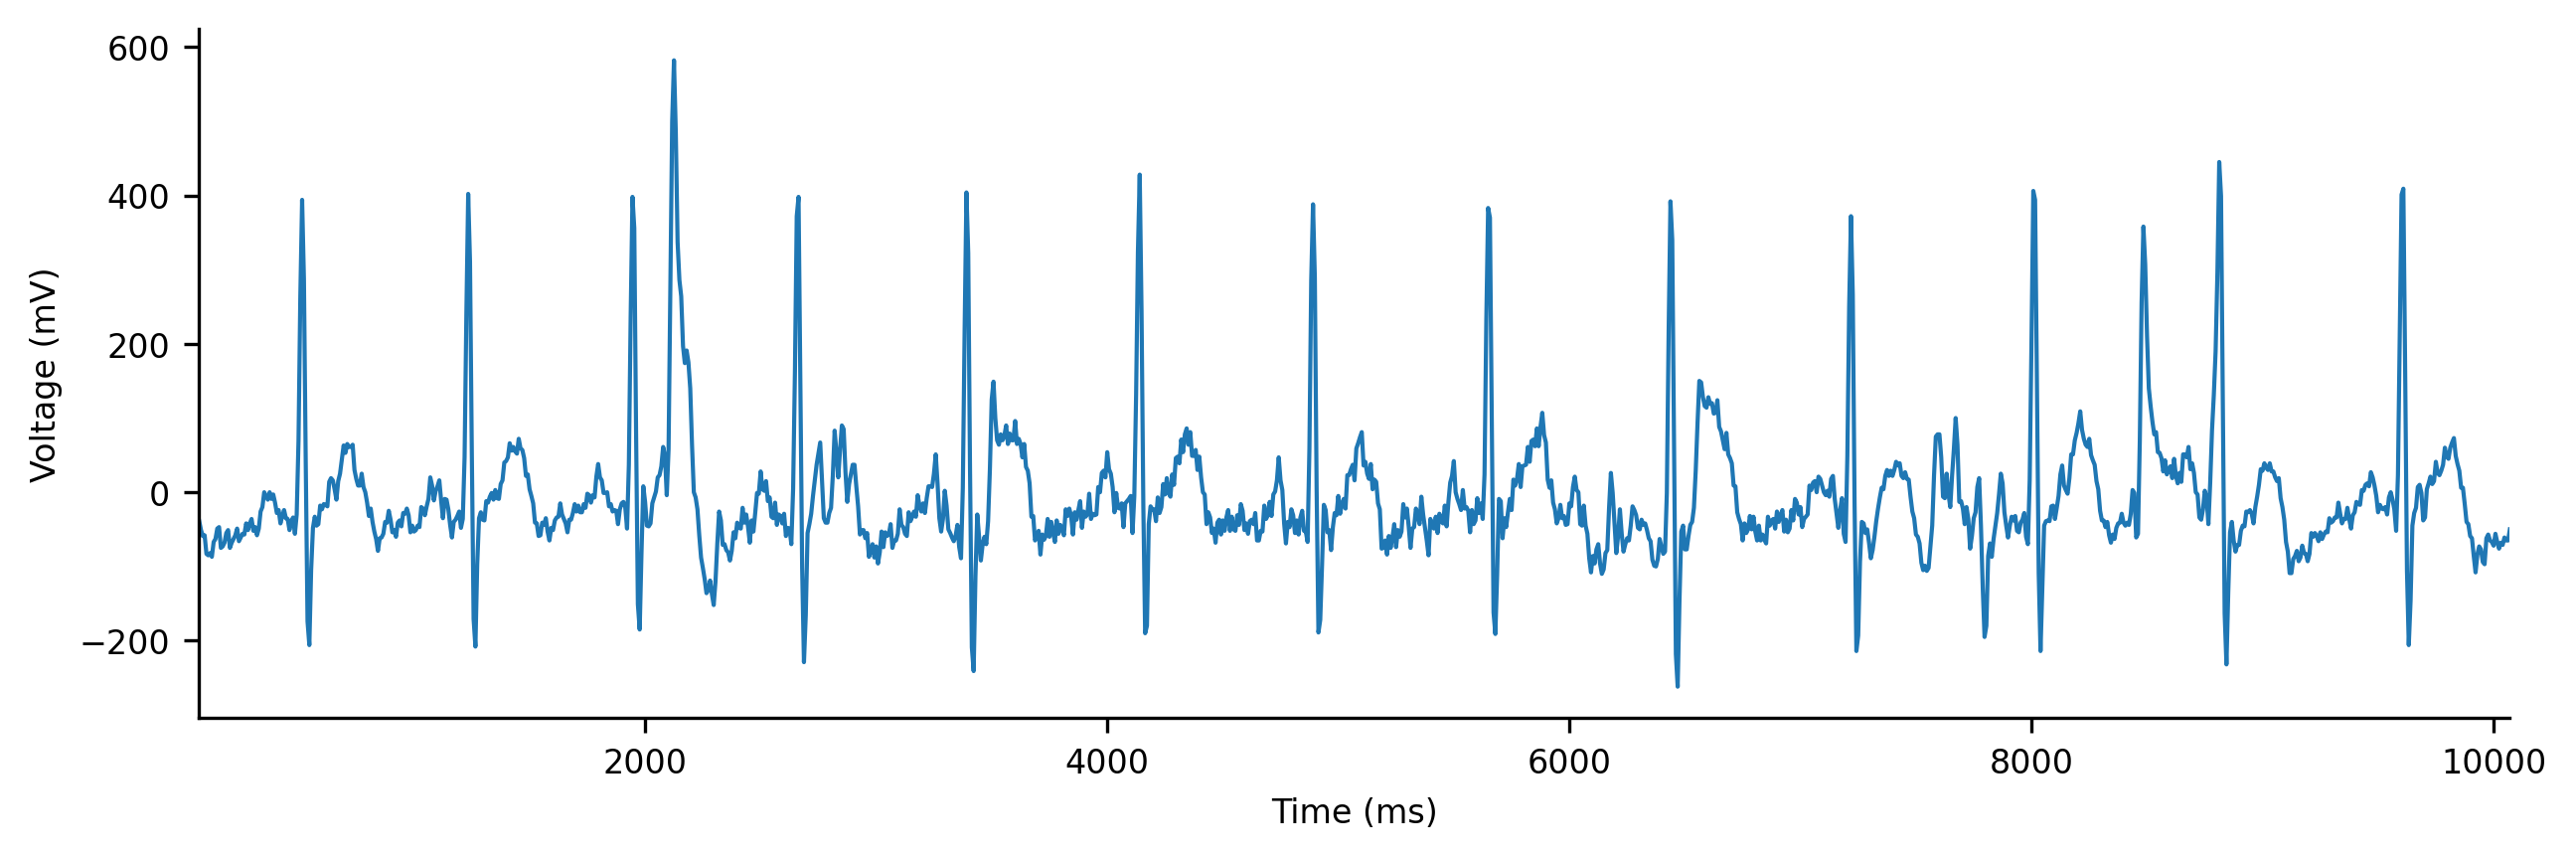

In [11]:
fig, ax = plt.subplots(figsize=(10, 3))  # create objects
ax.spines['top'].set_visible(False)  # hide top border
ax.spines['right'].set_visible(False)  # hide right border
ax.plot(ar[:, 0], ar[:, 1], lw=1)  # plot data with line width 1
ax.set_xlim(ar[:, 0].min(), ar[:, 0].max())  # x axis range
ax.set_xlabel("Time (ms)")  # x label
ax.set_ylabel("Voltage (mV)")  # y label
plt.savefig("nature_like.png")  # save

To save the data, use `numpy.savetxt`. Don't forget to open the saved file and see if the result is what you were aiming at.

In [12]:
np.savetxt("save_test.csv", ar)

`save_test.csv` looks like below:

> 7.031250000000000000e+01 -3.900000000000000000e+01
> 7.812500000000000000e+01 -5.100000000000000000e+01
> 8.593750000000000000e+01 -5.900000000000000000e+01
> 9.375000000000000000e+01 -5.800000000000000000e+01

because the default delimiter of `numpy.savetxt` is " " (white space). If you want to change the delimiter, add `delimiter=","` to the argument.

## `pandas` and `seaborn`: handling non-numerical data

`matplotlib` is not the only package for plotting. Here we introduce `seaborn`, which is a package for data visualization. `seaborn` is built on top of `matplotlib` and has more powerful tools for data visualization.

Let's start by loading "iris" dataset. This dataset contains 3 species of iris flowers and 4 features of each flower. The dataset is available in `seaborn` package, so you don't need to download it.

In [13]:
import seaborn as sns

df = sns.load_dataset("iris")
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


This `df` is a `pandas.DataFrame` object. `pandas.DataFrame` object is very similar to `numpy.ndarray` object, but it can handle non-numerical data better than `numpy`. You can access each element by indexing, but you can also access each column by its name. For example, `df["sepal_length"]` gives you the column of sepal length. We'll cover more when we handle machine learning.

One example of `seaborn` plot is below, `pairplot`. This plot shows the relationship between each pair of features. You can see that the diagonal elements are histograms of each feature.

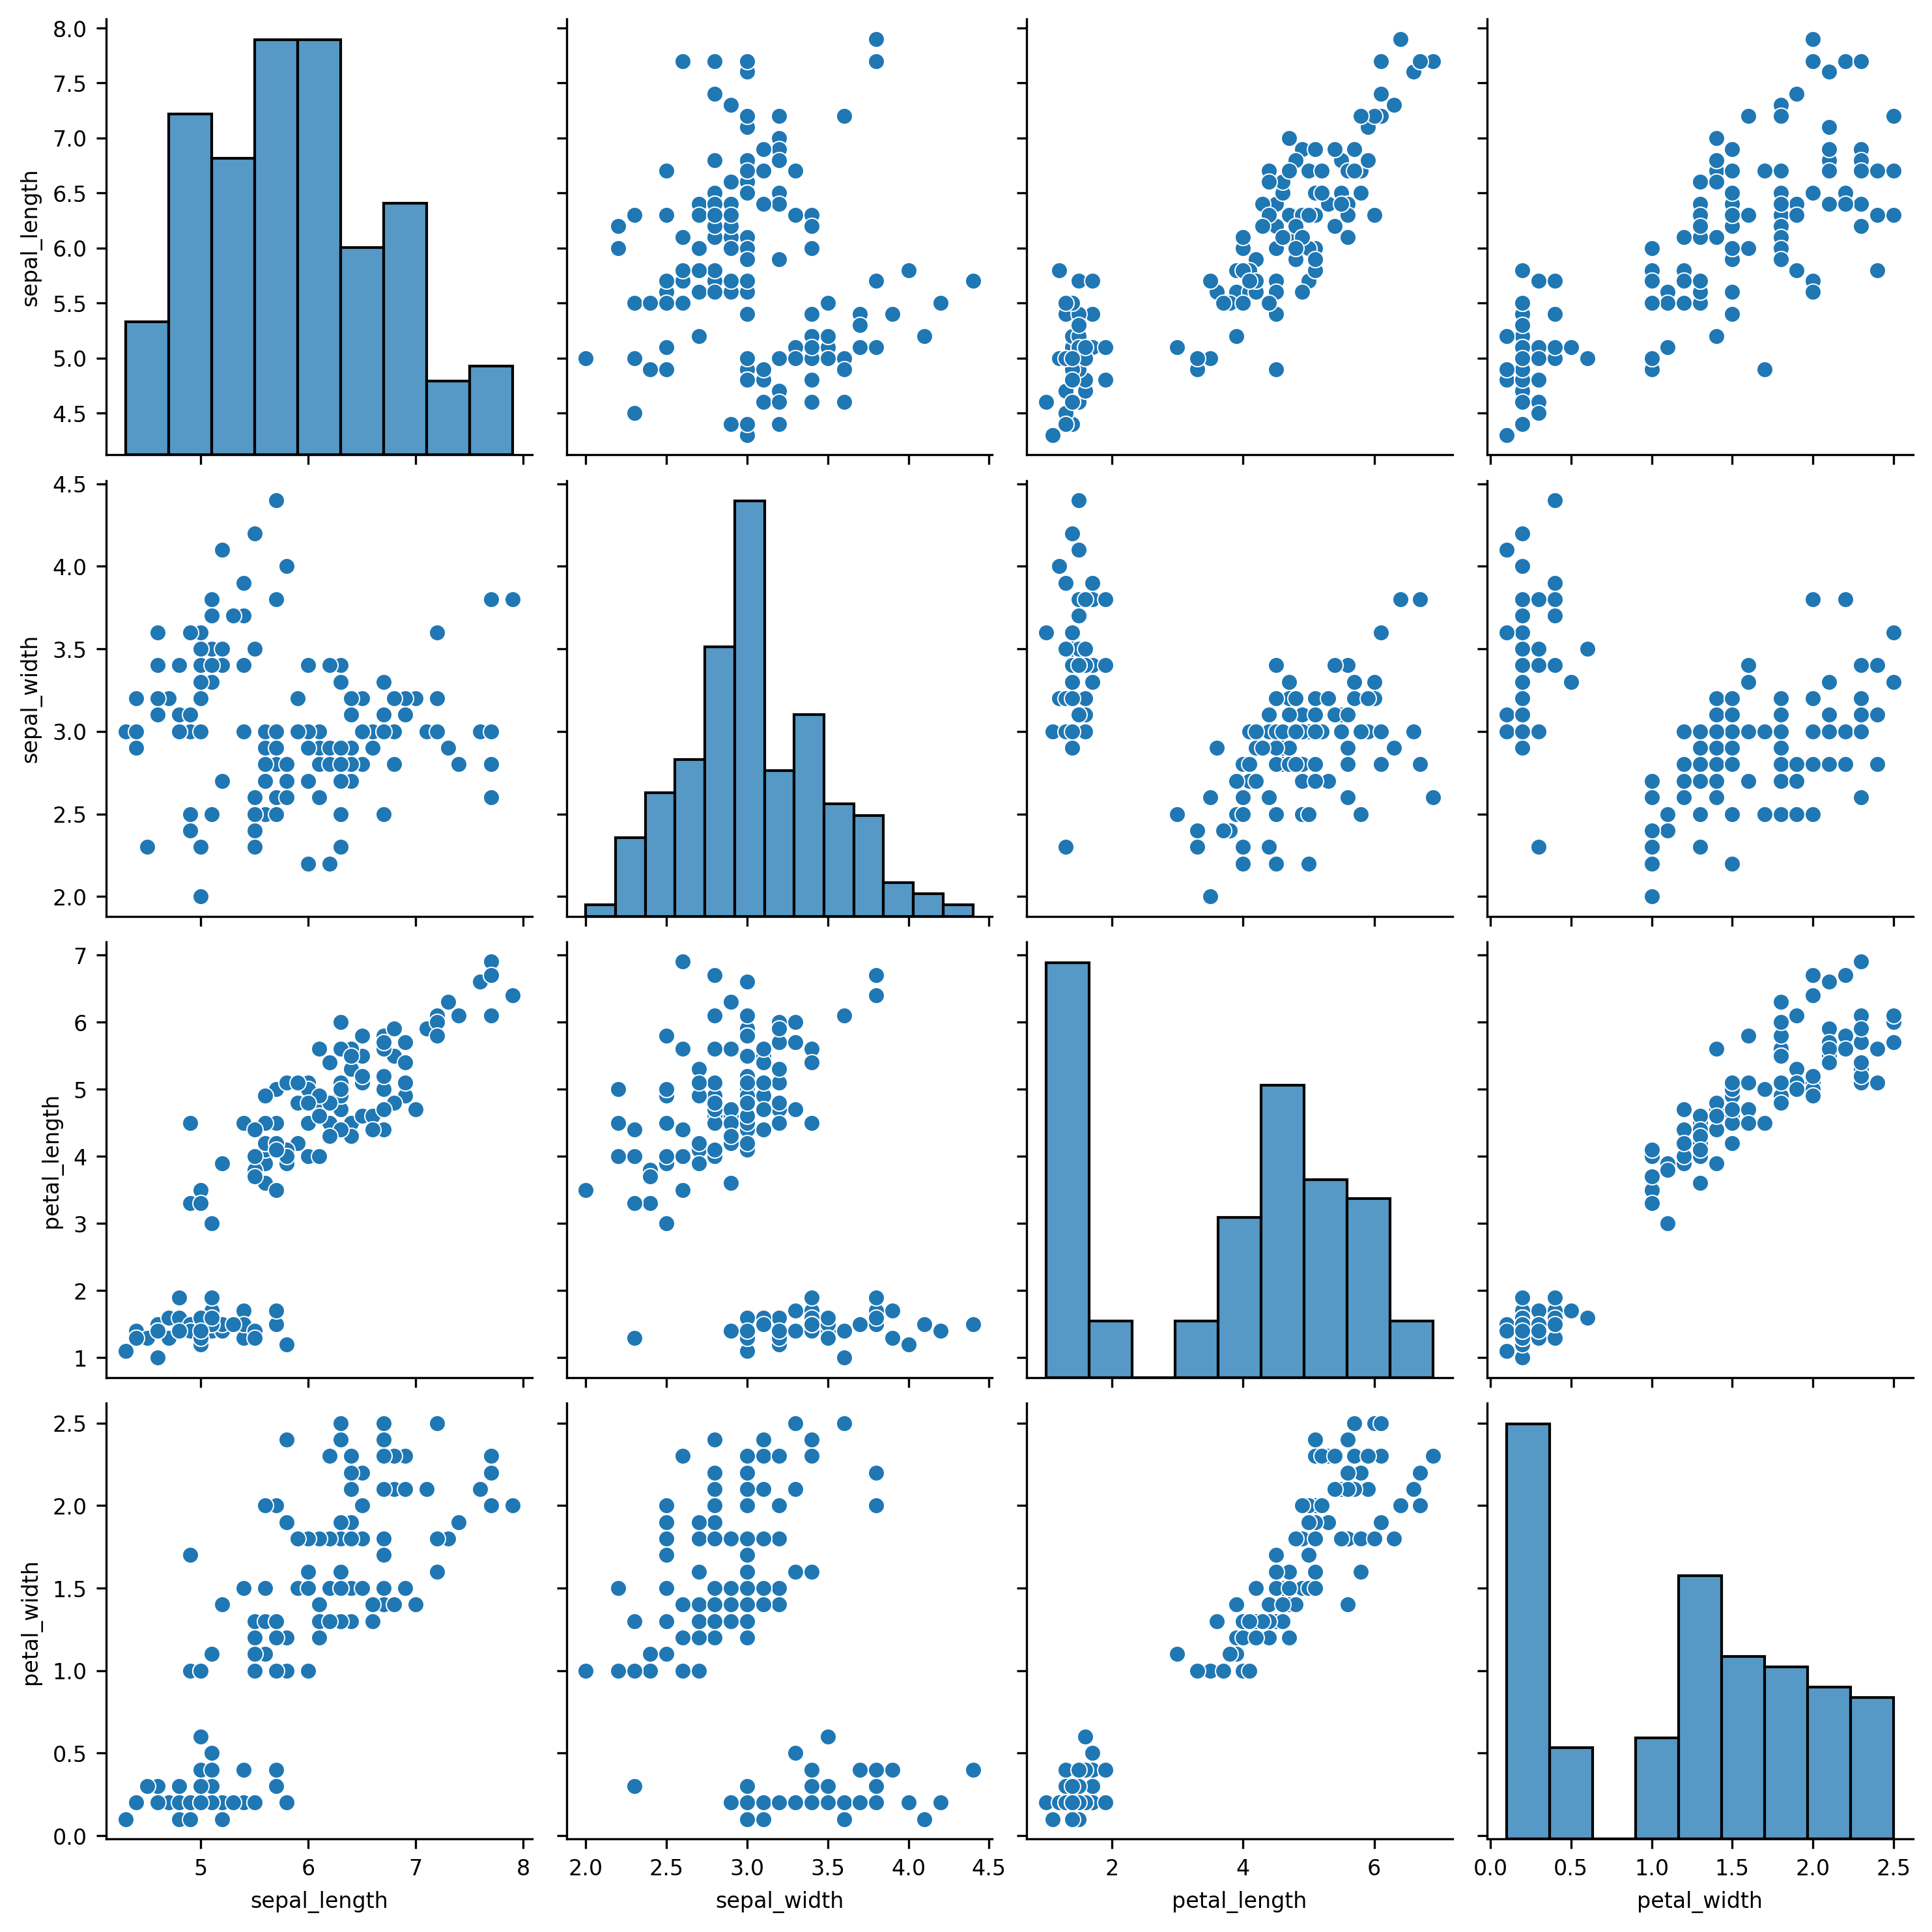

In [14]:
sns.pairplot(df)

You can also set the color, shape, size, etc. of each data point according to numerical/non-numerical data. Below is the example of the coloring the data points by species. You can give the name of column to the parameter `hue` and rest is handled by the function. Easy!

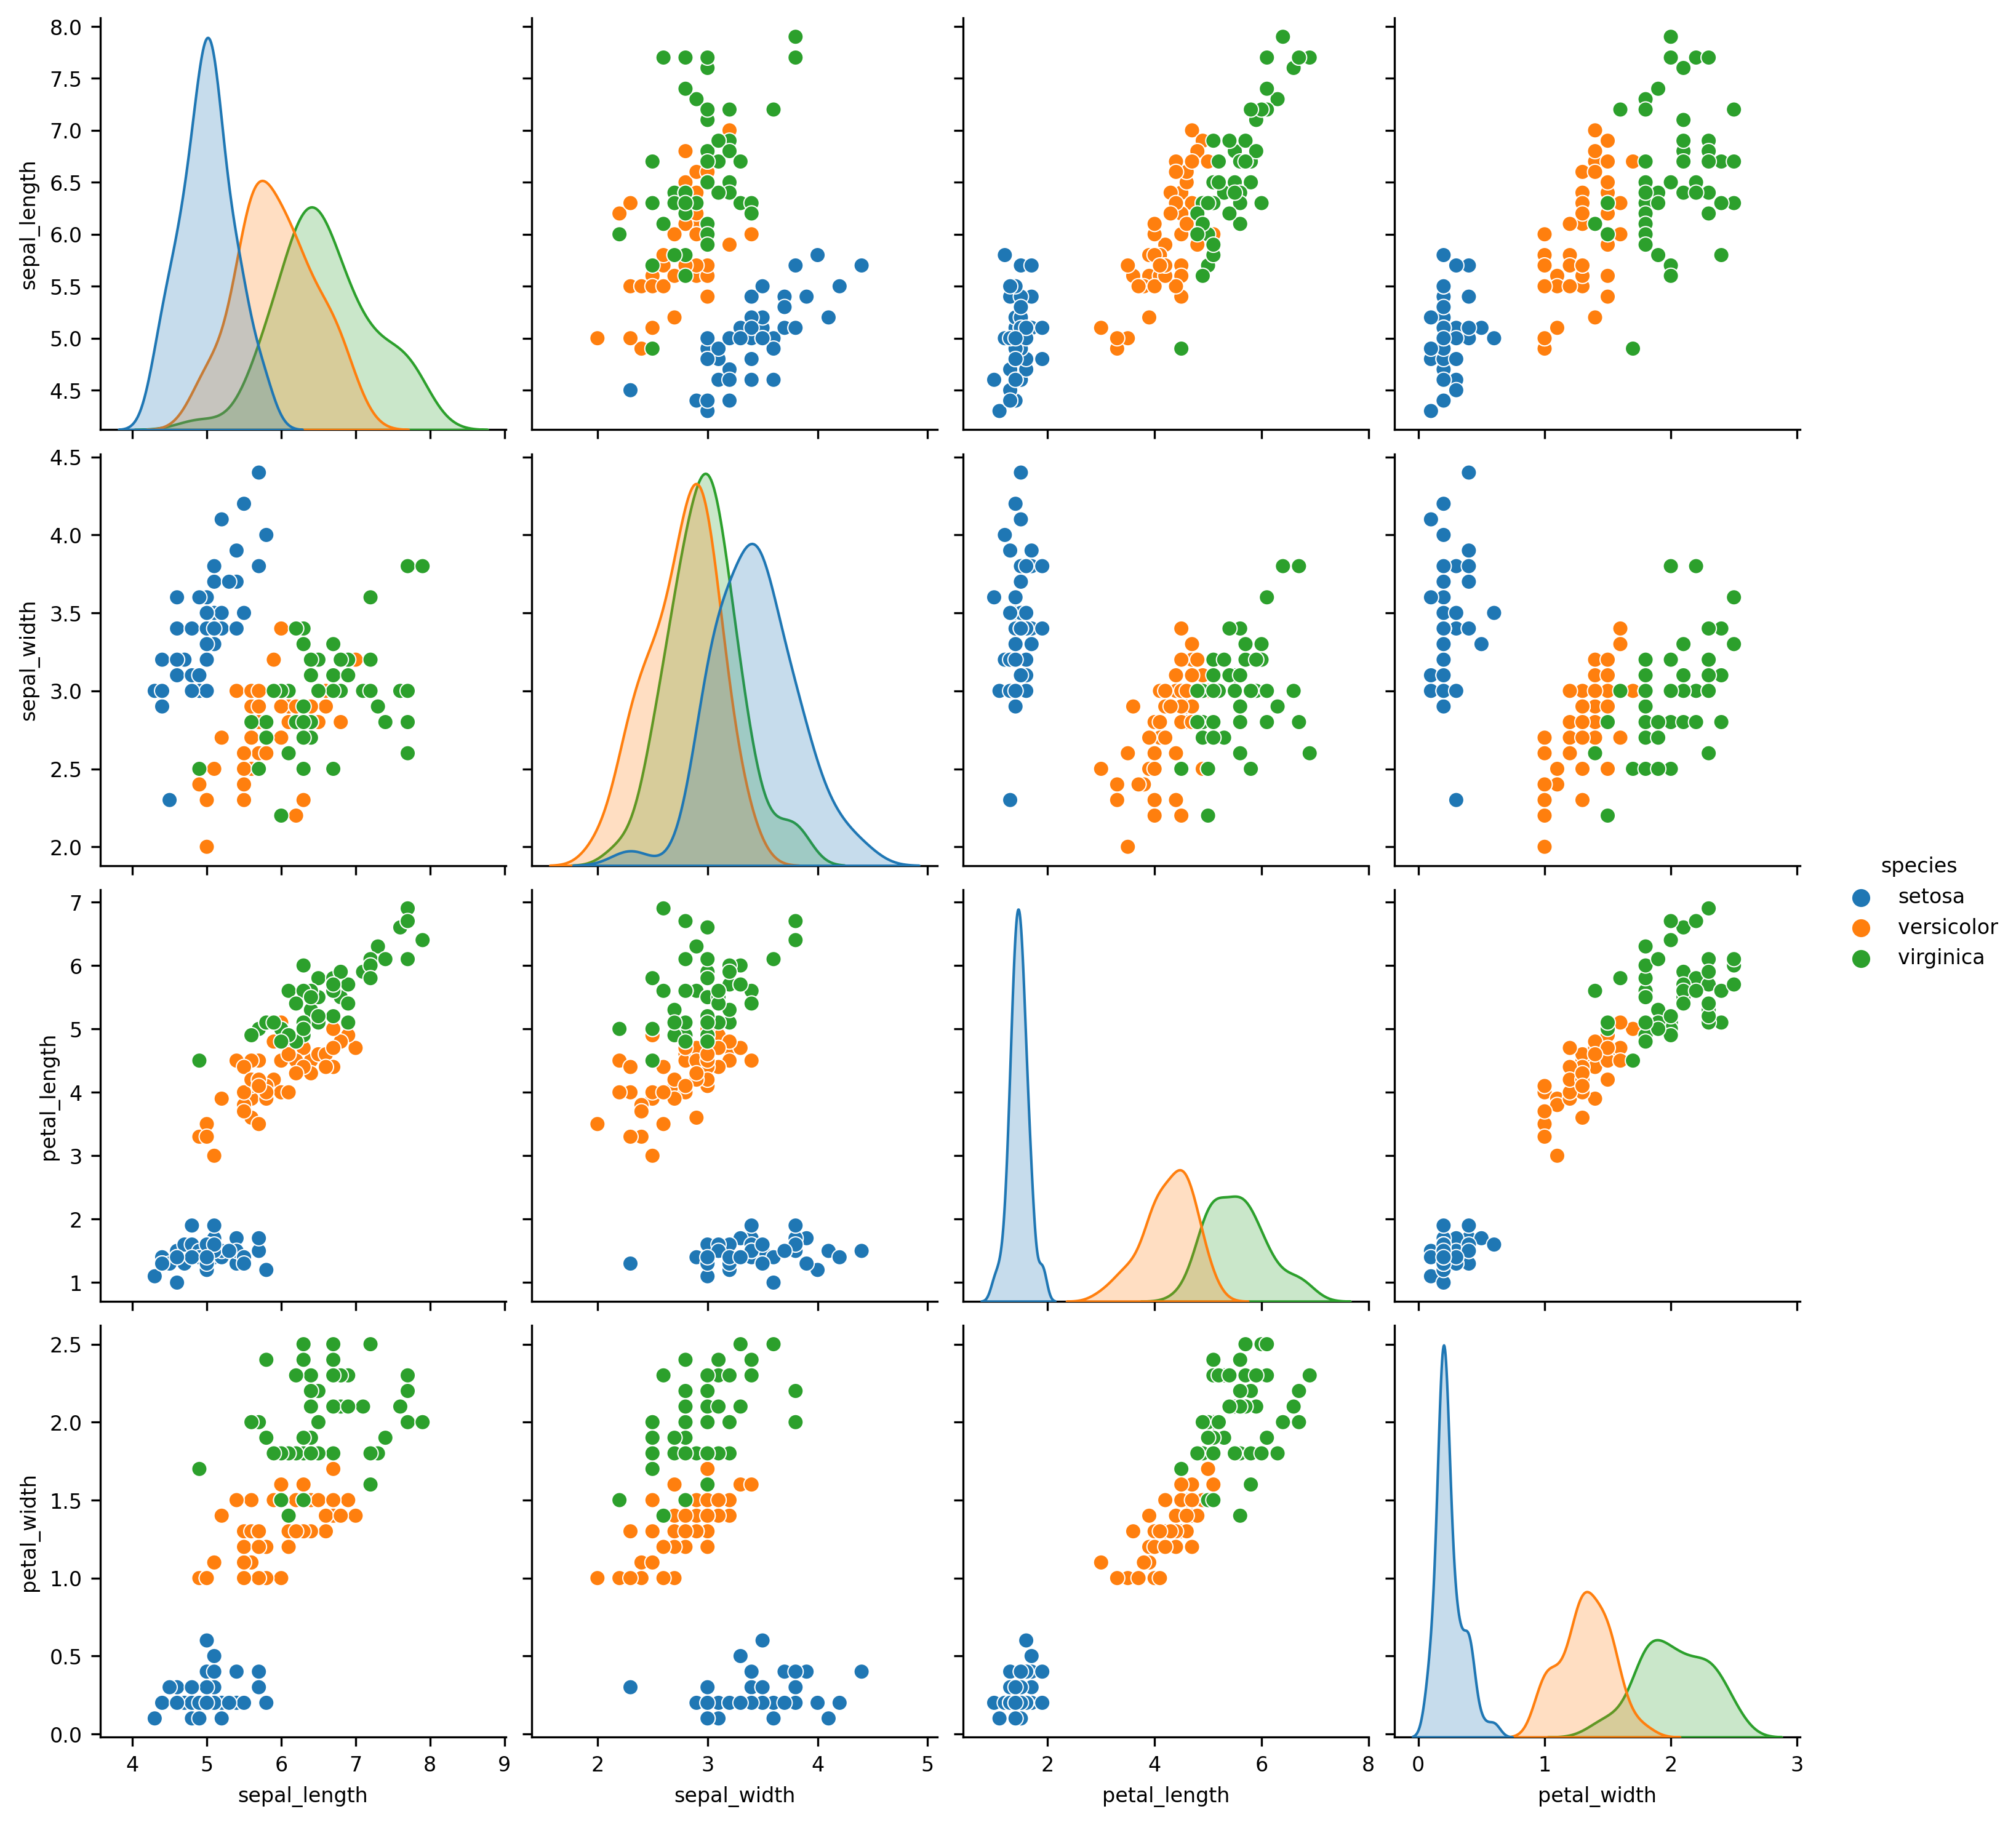

In [15]:
sns.pairplot(df, hue="species")

`seaborn` has many other functions for data visualization. Check the [Gallery](https://seaborn.pydata.org/examples/index.html) and find the one you like :)